## Бібліотеки

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Формуємо дані

In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

In [3]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [4]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

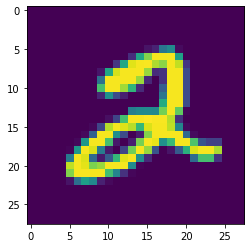

In [16]:
# Plot a single example
plt.imshow(train_data[5]);

In [17]:
train_labels[5]

2

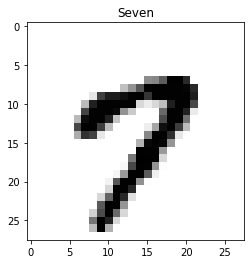

In [36]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 
               'Five', 'Six', 'Seven', 'Eight', 'Nine']

len(class_names)
plt.imshow(train_data[15], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[15]]);

## Формуємо класи

In [37]:
my_classes = [1, 2, 3]
train_index = np.where(np.in1d(train_labels, my_classes))
test_index = np.where(np.in1d(test_labels, my_classes))

In [38]:
x_train = train_data[train_index]
y_train = train_labels[train_index]
x_test = test_data[test_index]
y_test = test_labels[test_index]
print( "x_train.shape: ",x_train.shape)
print( "y_train.shape: ",y_train.shape)
print( "x_test.shape: ",x_test.shape)
print( "y_test.shape: ",y_test.shape)

x_train.shape:  (18831, 28, 28)
y_train.shape:  (18831,)
x_test.shape:  (3177, 28, 28)
y_test.shape:  (3177,)


In [39]:
print(len(x_train))
print(x_train)

18831
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


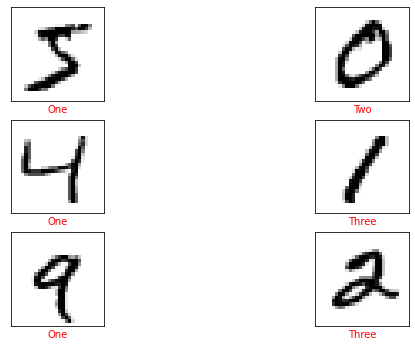

In [40]:
#картинки
plt.figure(figsize=(10,10))
for p in range(6):
    plt.subplot(5,2,p+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_data[p], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[p]], color='red')

## Модель

In [56]:
model_1 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(100 , activation='softmax'),
    Dense(9, activation='softmax')
])

model_1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.01), 
    metrics=['accuracy']
)


In [42]:
history = model_1.fit(
    x_train,y_train, 
    epochs = 10, 
    validation_data=(x_test,y_test), 
    batch_size = 512
)

Epoch 1/10
37/37 [==============================] - 1s 11ms/step - loss: 1.6990 - accuracy: 0.7070 - val_loss: 1.3096 - val_accuracy: 0.7438
Epoch 2/10
37/37 [==============================] - 0s 8ms/step - loss: 0.9849 - accuracy: 0.9112 - val_loss: 0.7166 - val_accuracy: 0.9544
Epoch 3/10
37/37 [==============================] - 0s 8ms/step - loss: 0.6287 - accuracy: 0.9157 - val_loss: 0.5246 - val_accuracy: 0.9037
Epoch 4/10
37/37 [==============================] - 0s 8ms/step - loss: 0.4575 - accuracy: 0.9304 - val_loss: 0.3493 - val_accuracy: 0.9594
Epoch 5/10
37/37 [==============================] - 0s 7ms/step - loss: 0.4546 - accuracy: 0.8778 - val_loss: 0.3002 - val_accuracy: 0.9559
Epoch 6/10
37/37 [==============================] - 0s 9ms/step - loss: 0.3564 - accuracy: 0.9359 - val_loss: 0.2565 - val_accuracy: 0.9644
Epoch 7/10
37/37 [==============================] - 0s 9ms/step - loss: 0.2845 - accuracy: 0.9467 - val_loss: 0.2557 - val_accuracy: 0.9503
Epoch 8/10
37/37 [=

In [43]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [44]:
test_loss, test_acc = model_1.evaluate(x_test,y_test)
print('Test accuracy : ', test_acc)

100/100 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9572
Test accuracy :  0.9571923017501831


## Перевірка

In [58]:
predictions = model_1.predict(x_test)

In [46]:
np.argmax(predictions[0])

3

In [47]:
test_labels[0]

7

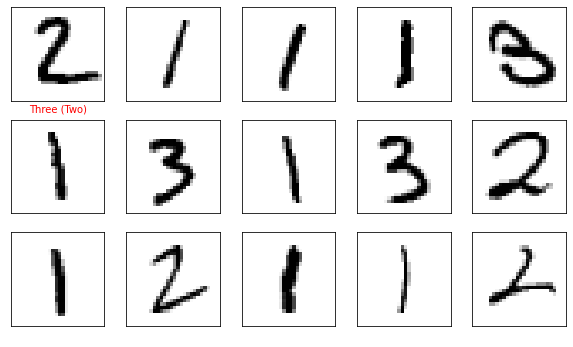

In [48]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if (predicted_label == true_label):
        color = 'white'
    else :
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color = color)

## Залежність точності від швидкості навчання

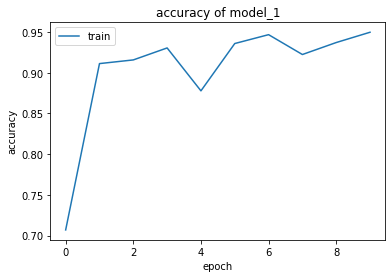

In [49]:
plt.plot(history.history['accuracy'])
plt.title('accuracy of model_1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## loss

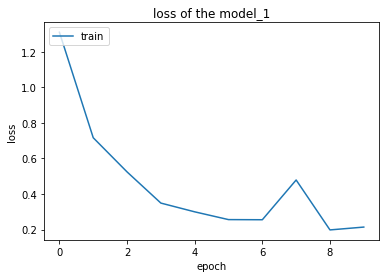

In [50]:
plt.plot(history.history['val_loss'])
plt.title('loss of the model_1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
model_2 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(100 , activation='relu'),
    Dense(9, activation='softmax')
])

model_2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)

In [60]:
history_2 = model_2.fit(
    x_train,y_train, 
    epochs = 20, 
    validation_data=(x_test,y_test), 
    batch_size = 512
)

Epoch 1/20
37/37 [==============================] - 1s 10ms/step - loss: 22.1530 - accuracy: 0.6645 - val_loss: 4.5061 - val_accuracy: 0.8946
Epoch 2/20
37/37 [==============================] - 0s 8ms/step - loss: 4.3055 - accuracy: 0.9086 - val_loss: 2.5083 - val_accuracy: 0.9308
Epoch 3/20
37/37 [==============================] - 0s 9ms/step - loss: 3.0169 - accuracy: 0.9313 - val_loss: 1.9031 - val_accuracy: 0.9465
Epoch 4/20
37/37 [==============================] - 0s 9ms/step - loss: 2.4080 - accuracy: 0.9435 - val_loss: 1.5681 - val_accuracy: 0.9540
Epoch 5/20
37/37 [==============================] - 0s 8ms/step - loss: 2.0396 - accuracy: 0.9512 - val_loss: 1.3783 - val_accuracy: 0.9575
Epoch 6/20
37/37 [==============================] - 0s 10ms/step - loss: 1.7713 - accuracy: 0.9557 - val_loss: 1.2300 - val_accuracy: 0.9619
Epoch 7/20
37/37 [==============================] - 0s 9ms/step - loss: 1.5418 - accuracy: 0.9599 - val_loss: 1.1610 - val_accuracy: 0.9651
Epoch 8/20
37/37 

In [61]:
test_loss, test_acc = model_2.evaluate(x_test,y_test)
print('Test accuracy : ', test_acc)

100/100 [==============================] - 0s 2ms/step - loss: 0.7463 - accuracy: 0.9748
Test accuracy :  0.974819004535675


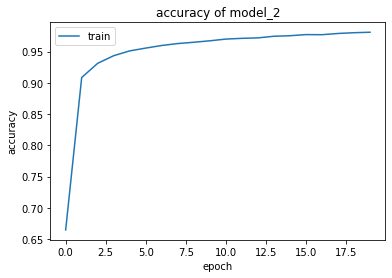

In [62]:
plt.plot(history_2.history['accuracy'])
plt.title('accuracy of model_2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

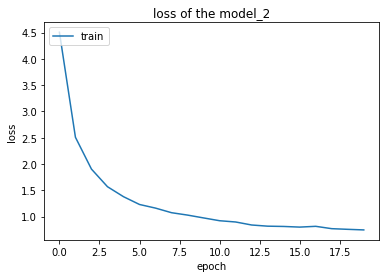

In [63]:
plt.plot(history_2.history['val_loss'])
plt.title('loss of the model_2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()